## Prerequisites 

### Create a virtual environment with required packages

You can follow the instructions in the README on how to create a conda environment that can run thsi notebook. You can then choose the kernel you created to run this notebook.

### Get the credentials to access polytope. 

You need to have an account on the [Destination Earth Platform](https://auth.destine.eu/realms/desp/account).

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [1]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [2]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

The generated access tokens will be written to `~/.polytopeapirc`.

In [3]:
import xarray as xr
import numpy as np
import eccodes
import earthkit.data
import healpy as hp
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
from polytope.api import Client

In [4]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

In [5]:
request = {
        "class": "d1",
        "dataset": "climate-dt",
        "activity": "scenariomip",
        "experiment": "ssp3-7.0",
        "realization": "1",
        "generation" : "1",
        "model": "icon",
        "resolution": "high",
        "expver": "0001",
        "stream": "clte",
        "date": "20251129",
        "time": "0000",
        "type": "fc",
        "levelist" : "2",
        "levtype": "o3d",
        "param": "263501"
}

In [6]:
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
else:
    data = earthkit.data.from_source("file", "data/climate-dt-healpix-ocean-example.grib")

In [7]:
dnp=data[0].values-273

hp.pixelfunc.get_map_size(dnp)

12582912

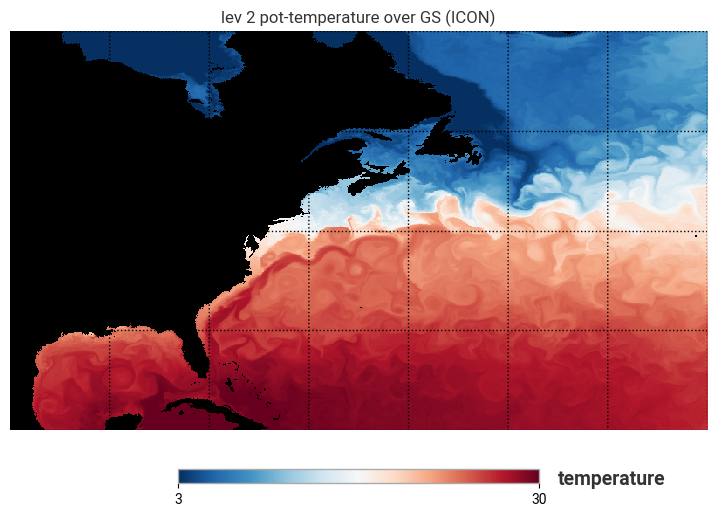

In [8]:

interpolated_data = hp.cartview(dnp,
            flip="geo", 
            nest=True, 
            rot=[0,0,],
            unit='temperature',
            lonra=[-100,-30],
            latra=[20, 60],
            title='lev 2 pot-temperature over GS (ICON)',
            min=3,
            max=30,
            # notext=True
            cmap =cm.RdBu_r,
            badcolor='black',
            return_projected_map=True
           )
hp.graticule(dpar=10, dmer=10)


In [9]:
request2 = {
        "class": "d1",
        "dataset": "climate-dt",
        "activity": "scenariomip",
        "experiment": "ssp3-7.0",
        "realization": "1",
        "generation" : "1",
        "model": "ifs-nemo",
        "resolution": "high",
        "expver": "0001",
        "stream": "clte",
        "date": "20251129",
        "time": "0000",
        "type": "fc",
        "levelist" : "2",
        "levtype": "o3d",
        "param": "263501"
    }

In [10]:
if LIVE_REQUEST:
    data2 = earthkit.data.from_source("polytope", "destination-earth", request2, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
else:
    data2 = earthkit.data.from_source("file", "data/climate-dt-healpix-ocean-example2.grib")

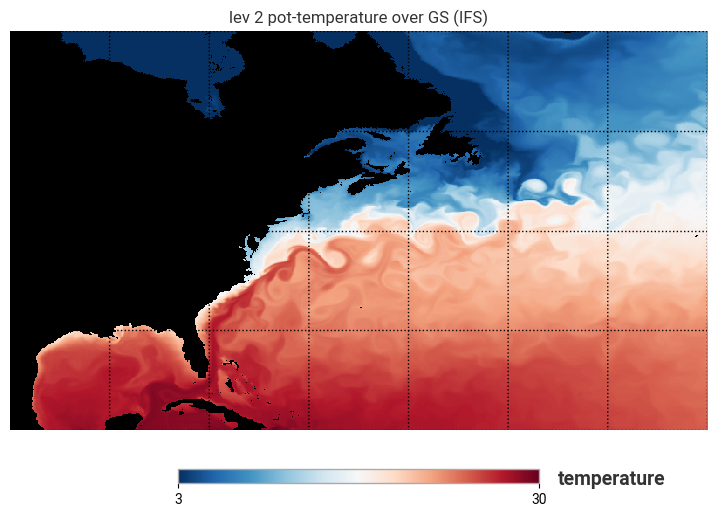

In [11]:
dnp2=data2[0].values-273

interpolated_data = hp.cartview(dnp2,
            flip="geo", 
            nest=True, 
            rot=[0,0,],
            unit='temperature',
            lonra=[-100,-30],
            latra=[20, 60],
            title='lev 2 pot-temperature over GS (IFS)',
            min=3,
            max=30,
            # notext=True
            cmap =cm.RdBu_r,
            badcolor='black',
            return_projected_map=True
           )
hp.graticule(dpar=10, dmer=10)